## Normality check

## Basics

\begin{align*}
E(X) &= \int xf(x)dx = \mu \\
Var(X) &= E(X-E(X))^2 = E(X^2) -[E(x)]^2  \\
Skewness(X) &= E \left[\left( \frac{X-\mu}{\sigma} \right)^3\right] \\
Kurtosis(X) &=  E \left[\left( \frac{X-\mu}{\sigma} \right)^4\right] \\
cov(X,Y) &= E[(X-E(X))(Y-E(Y)]= E(XY)-E(X)E(Y)\\
corr(X, Y) &= \frac{Cov(X,Y)}{\sigma_x \sigma_y}
\end{align*}

-  Mean: Location parameter: particular place on an axis
-  Variance: scale parameter: how wide the distribution is
-  Skewness: shape parameter: about symmetry
   -  skew=0  perfect symmetry;  
   -  skew >0 $\Leftrightarrow$ (positively skewed) $\Leftrightarrow$  (long tail in right)
   -  skew < 0 $\Leftrightarrow$ (negatively skewed) $\Leftrightarrow$  (long tail in left)
-  Kurtosis: shaper parameter: tail’s heaviness
   -  normal case Kurtosis=3

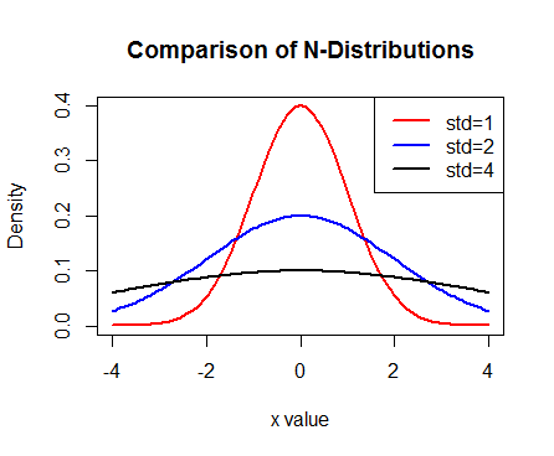

In [ ]:
from IPython.display import Image
Image("c:/python/Images/normal(diff_sig).png")

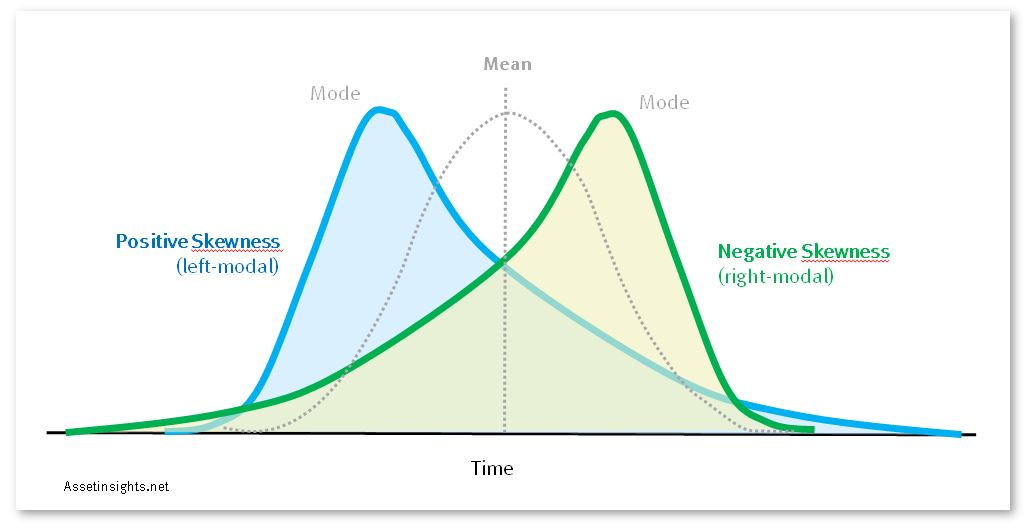

In [ ]:
from IPython.display import Image
Image("c:/python/Images/Curves_Modal_Left_and_Right.JPG")

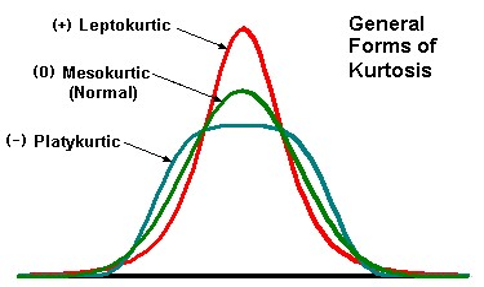

In [ ]:
from IPython.display import Image
Image("c:/python/Images/kurtosis.png")

### Why do we care about normality? 
- statistical efficiency? central limit theorem 
- random walk vs. martingale?
- Most of financial theories assume that returns are normal or log-normal?
  -  optimal portfolio allocation

### Normality check with real data
- basic statistics (`describe()` in pandas)
- histogram
- qq-plot

#### data loading

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [ ]:
data = pd.read_csv("c:/python/data/pff/data_close.csv")
data.set_index('Date', inplace=True)
data = data.dropna()
ret = data.pct_change()
ret = ret.dropna()

#### Statistics

In [ ]:
ret.AAPL.describe()

count    1900.000000
mean        0.001363
std         0.017276
min        -0.123558
25%        -0.006828
50%         0.000892
75%         0.010430
max         0.088741
Name: AAPL, dtype: float64

In [ ]:
print_statistics(ret.AAPL)
print_statistics(ret.GSPC)
print_statistics(ret.JPY)
print_statistics(ret.GLD)

     statistic           value
------------------------------
          size      1900.00000
           min        -0.12356
           max         0.08874
          mean         0.00136
           std         0.01728
          skew        -0.11198
      kurtosis         3.92980
     statistic           value
------------------------------
          size      1900.00000
           min        -0.07001
           max         0.04741
          mean         0.00054
           std         0.01000
          skew        -0.68336
      kurtosis         5.65725
     statistic           value
------------------------------
          size      1900.00000
           min        -0.03675
           max         0.03820
          mean         0.00012
           std         0.00647
          skew         0.06713
      kurtosis         3.75864
     statistic           value
------------------------------
          size      1900.00000
           min        -0.13069
           max         0.05470
        

In [ ]:
normality_tests(ret.AAPL)    # H0: skewness or kurtosis = normal using scipy.stat.skewtest

Skew of data set          -0.112
Skew test p-value          0.046
Kurt of data set           3.930
Kurt test p-value          0.000
Norm test p-value          0.000


#### Histogram: real data 

In [ ]:
from scipy.stats import norm 

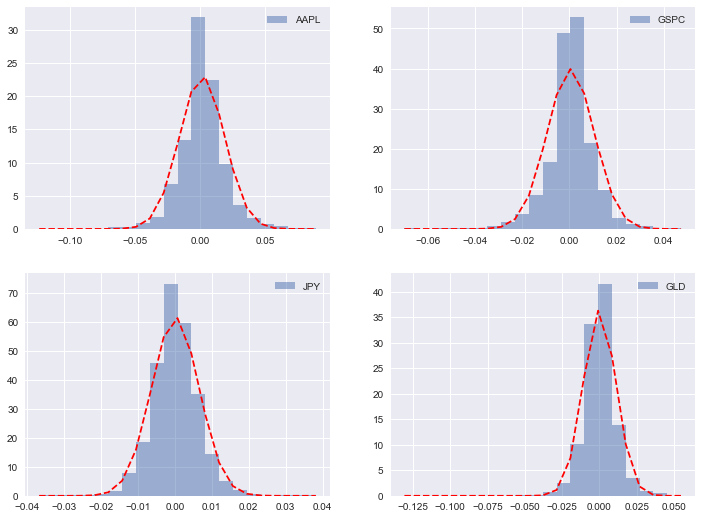

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,9))
    
nobs, bins, patches = axs[0][0].hist(ret['AAPL'], bins=20, density=True, alpha=0.5)
axs[0][0].plot(bins,norm.pdf(bins, ret.AAPL.mean(), ret.AAPL.std()), c='r', ls='--')
axs[0][0].legend()

nobs, bins, patches = axs[0][1].hist(ret['GSPC'], bins=20, density=True, alpha=0.5)
axs[0][1].plot(bins,norm.pdf(bins, ret.GSPC.mean(), ret.GSPC.std()), c='r', ls='--')
axs[0][1].legend()

nobs, bins, patches = axs[1][0].hist(ret['JPY'], bins=20, density=True, alpha=0.5)
axs[1][0].plot(bins,norm.pdf(bins, ret.JPY.mean(), ret.JPY.std()), c='r', ls='--')
axs[1][0].legend()

nobs, bins, patches = axs[1][1].hist(ret['GLD'], bins=20, density=True, alpha=0.5)
axs[1][1].plot(bins,norm.pdf(bins, ret.GLD.mean(), ret.GLD.std()), c='r', ls='--')
axs[1][1].legend()

In [ ]:
plt.scatter(ret.GSPC, ret.AAPL, marker= '')
labels = ret.index[-10:]
for i, label in enumerate(labels):
    plt.annotate(label, (ret.GSPC.iloc[i], ret.AAPL.iloc[i]))

In [ ]:
#label = ret.AAPL.index[678]
(ret.AAPL.iloc[678], ret.AAPL.index[678])

(-0.12355795040274975, '2013-01-24')

Text(700,-0.123558,'2013-01-24: due to iphon sales')

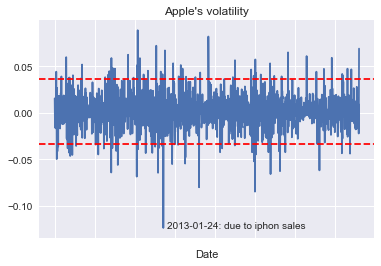

In [ ]:
%matplotlib inline 
ret.AAPL.plot()
lline = ret.AAPL.mean() - 2. * ret.AAPL.std()
uline = ret.AAPL.mean() +  2. * ret.AAPL.std()
plt.axhline(lline, c='r', ls='--')
plt.axhline(uline, c='r', ls='--')
plt.title("Apple's volatility")
plt.annotate('2013-01-24: due to iphon sales', ([700,ret.AAPL.iloc[678]]))

#plt.annotate('2013-01-24', (ret.AAPL.index[678],ret.AAPL.iloc[678]))  # don't work
#ret.AAPL.index[np.where(ret.AAPL == ret.AAPL.min())]   # pre-chore

In [ ]:
from statsmodels.formula.api import ols 
model_fit = ols('AAPL~1+GSPC', data=ret).fit()
print(model_fit.summary())

In [ ]:
import scipy.stats as scs
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))
    
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])    